In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import re
from os.path import join
from os.path import isdir, dirname, split, basename, splitext, exists

from shapely.wkb import dumps, loads
from shapely.geometry import Polygon
from shapely.affinity import translate

from skimage.io import imread, imsave
from skimage.color import rgb2gray
from skimage.morphology import label
from skimage.measure import label, find_contours, regionprops

from sqlalchemy.sql import func
from sqlalchemy.orm import aliased

from pysin.spatial_index import SpatialIndex
from pysin.models import Region

from faim_hcs.hcs.Experiment import Experiment
from faim_hcs.records.PlateRecord import PlateRecord
from faim_hcs.records.WellRecord import WellRecord
from faim_hcs.records.OrganoidRecord import OrganoidRecord

from glob import glob

from tqdm.notebook import tqdm

import re

from skimage import data
from skimage.registration import phase_cross_correlation
from scipy.ndimage import shift

import copy

import matplotlib.pyplot as plt

pd.set_option("display.max_rows", None)

In [14]:
!jupyter kernelspec list

/bin/bash: jupyter: command not found


## User defined parameters:

In [2]:
RX_name = "R3"
#must be relative to R0
R0_dir = '/tungstenfs/scratch/gliberal/Users/repinico/Microscopy/Analysis/20220528_GCPLEX_redo/20220507GCPLEX_R0/summary.csv'
RX_dir = '/tungstenfs/scratch/gliberal/Users/repinico/Microscopy/Analysis/20220528_GCPLEX_redo/20220507GCPLEX_R3/summary.csv'


min_region_dist = 300  # NOTE as manhattan distance
min_similariry_score = 0.4  # 0.0: worst score .. 1.0: best score
ovr_channel = "C01" #almost always DAPI is C01 -- if not, change this!





## Load experiments

In [3]:
R0 = Experiment()
R0.load(R0_dir)

RX = Experiment()
RX.load(RX_dir)

names = ["R0", RX_name]
exps = [R0, RX]

zipd = zip(names, exps)
rounds = dict(zipd)

seg_name = RX_name + "_linked"
folder_name = "obj_v0.3_registered_" + RX_name


## Pre-register OVR images, save, and add to hcs experiment

day2p5 B04 shifts: [-8. 16.]


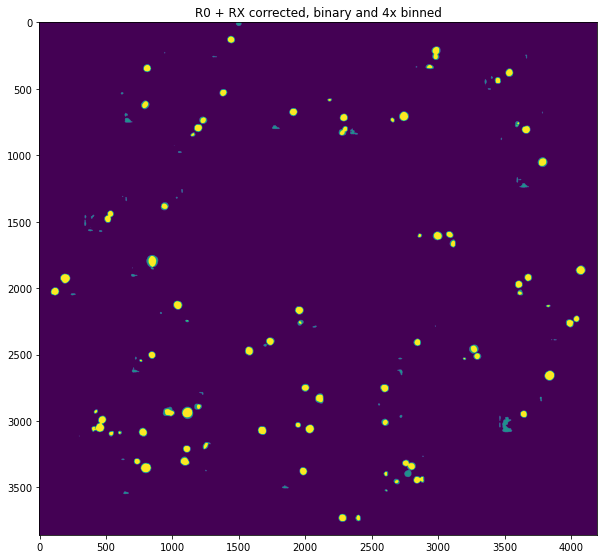

Cannot interpret '<attribute 'dtype' of 'numpy.generic' objects>' as a data type
Cannot interpret '<attribute 'dtype' of 'numpy.generic' objects>' as a data type
day2p5 B06 shifts: [-20.  28.]


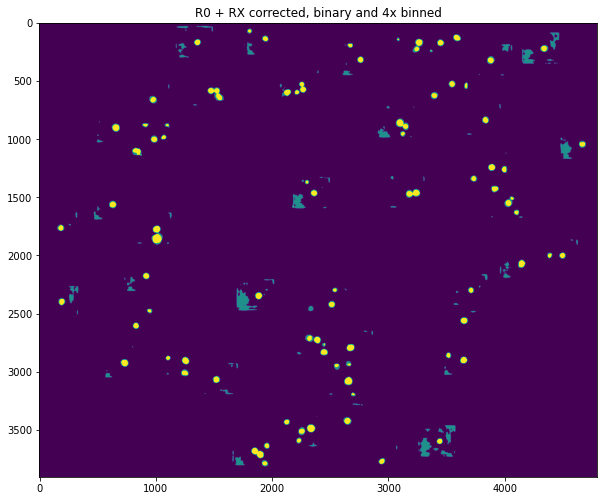

Cannot interpret '<attribute 'dtype' of 'numpy.generic' objects>' as a data type
Cannot interpret '<attribute 'dtype' of 'numpy.generic' objects>' as a data type
day2p5 B05 shifts: [-12.  24.]


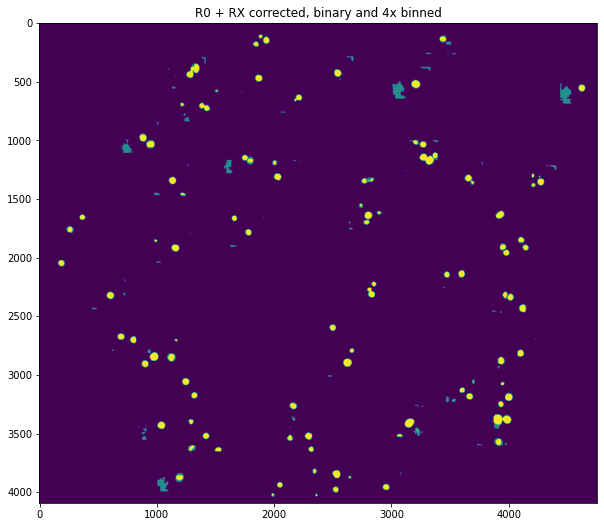

Cannot interpret '<attribute 'dtype' of 'numpy.generic' objects>' as a data type
Cannot interpret '<attribute 'dtype' of 'numpy.generic' objects>' as a data type
day2p5 B03 shifts: [-12.  24.]


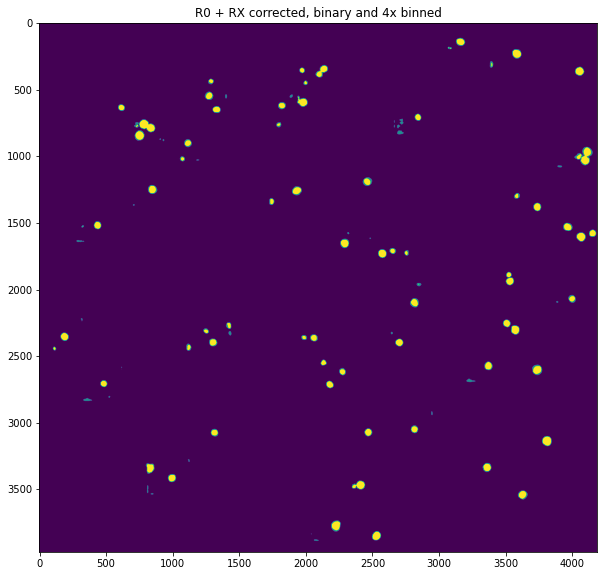

Cannot interpret '<attribute 'dtype' of 'numpy.generic' objects>' as a data type
Cannot interpret '<attribute 'dtype' of 'numpy.generic' objects>' as a data type
day1p5 B03 shifts: [-36.  12.]


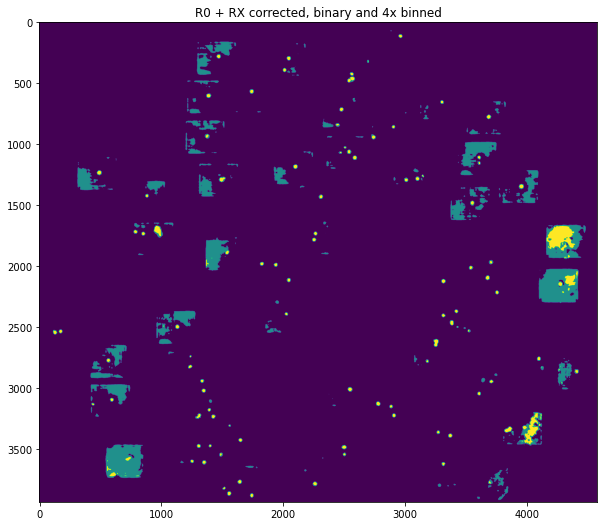

Cannot interpret '<attribute 'dtype' of 'numpy.generic' objects>' as a data type
Cannot interpret '<attribute 'dtype' of 'numpy.generic' objects>' as a data type
day1p5 B05 shifts: [-32.  28.]


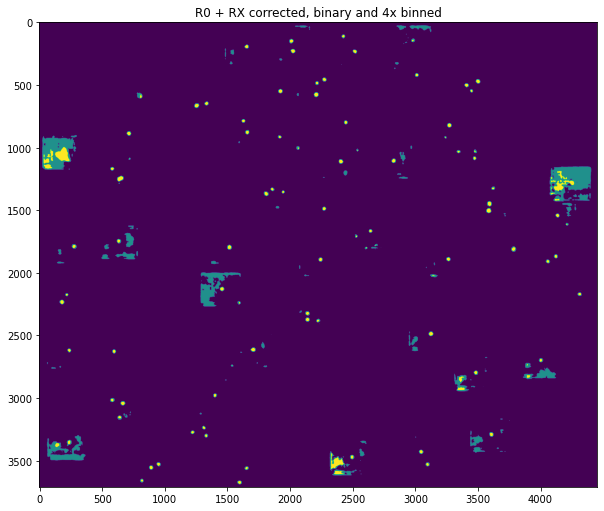

Cannot interpret '<attribute 'dtype' of 'numpy.generic' objects>' as a data type
Cannot interpret '<attribute 'dtype' of 'numpy.generic' objects>' as a data type
day1p5 B06 shifts: [-36.   0.]


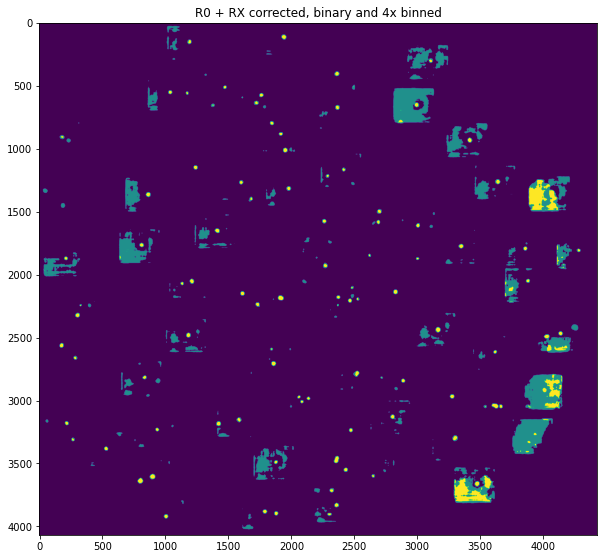

Cannot interpret '<attribute 'dtype' of 'numpy.generic' objects>' as a data type
Cannot interpret '<attribute 'dtype' of 'numpy.generic' objects>' as a data type
day1p5 B04 shifts: [-32.  28.]


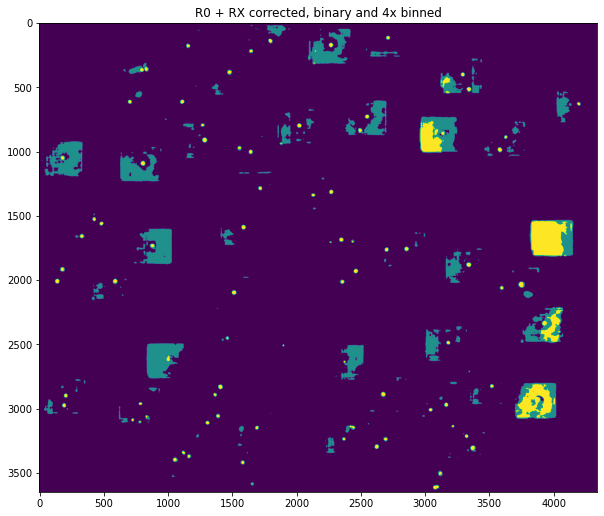

Cannot interpret '<attribute 'dtype' of 'numpy.generic' objects>' as a data type
Cannot interpret '<attribute 'dtype' of 'numpy.generic' objects>' as a data type
day4p5 B06 shifts: [0. 0.]


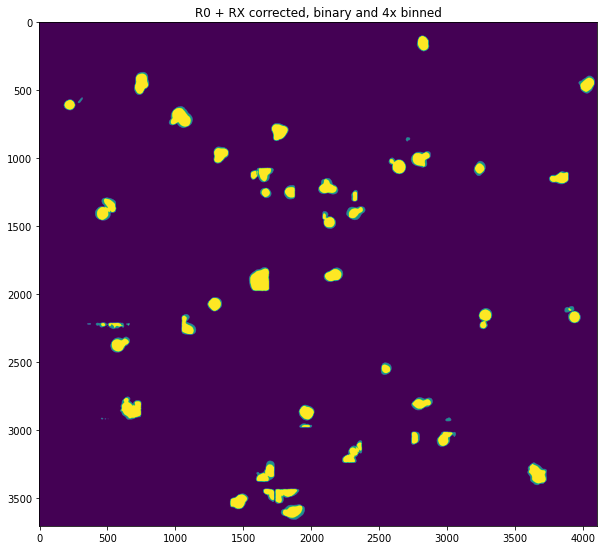

Cannot interpret '<attribute 'dtype' of 'numpy.generic' objects>' as a data type
Cannot interpret '<attribute 'dtype' of 'numpy.generic' objects>' as a data type
day4p5 B03 shifts: [-48.  44.]


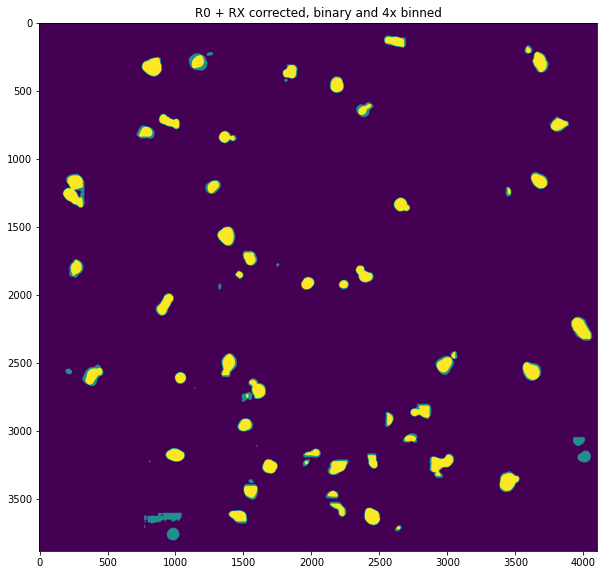

Cannot interpret '<attribute 'dtype' of 'numpy.generic' objects>' as a data type
Cannot interpret '<attribute 'dtype' of 'numpy.generic' objects>' as a data type
day4p5 B04 shifts: [-24.  12.]


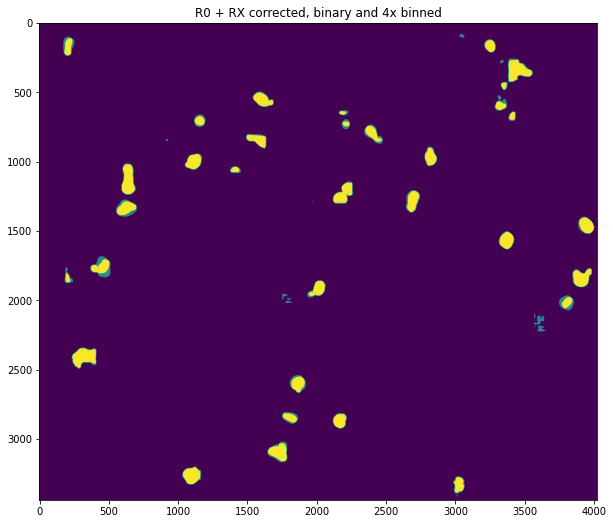

Cannot interpret '<attribute 'dtype' of 'numpy.generic' objects>' as a data type
Cannot interpret '<attribute 'dtype' of 'numpy.generic' objects>' as a data type
day4p5 B05 shifts: [0. 0.]


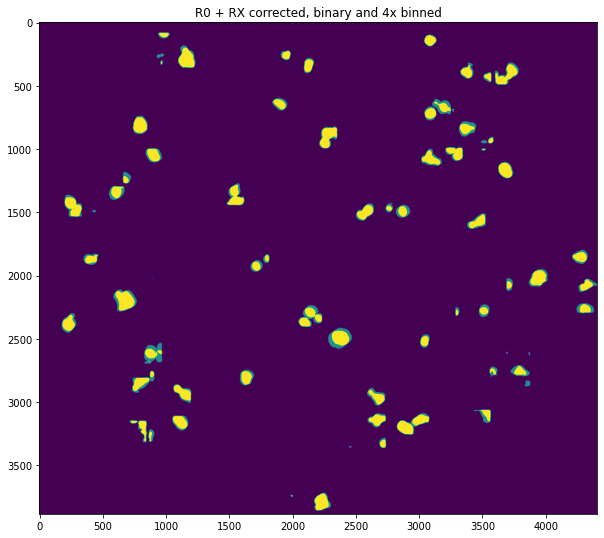

Cannot interpret '<attribute 'dtype' of 'numpy.generic' objects>' as a data type
Cannot interpret '<attribute 'dtype' of 'numpy.generic' objects>' as a data type
day3p5 B05 shifts: [-72.  72.]


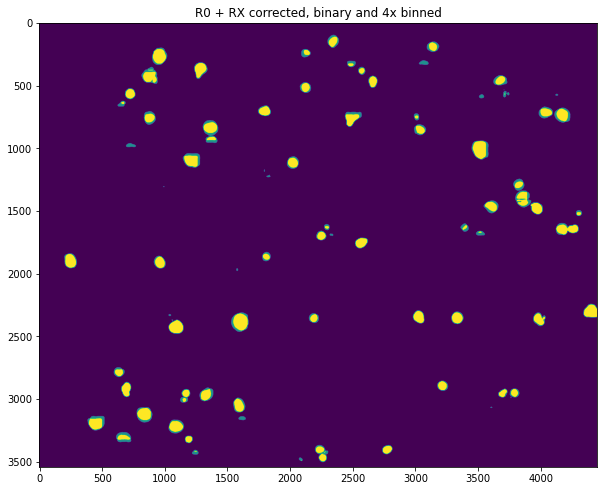

Cannot interpret '<attribute 'dtype' of 'numpy.generic' objects>' as a data type
Cannot interpret '<attribute 'dtype' of 'numpy.generic' objects>' as a data type
day3p5 B04 shifts: [-92.  52.]


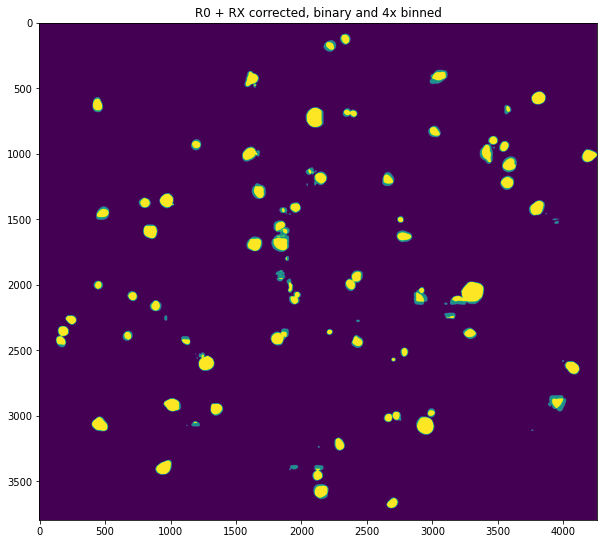

Cannot interpret '<attribute 'dtype' of 'numpy.generic' objects>' as a data type
Cannot interpret '<attribute 'dtype' of 'numpy.generic' objects>' as a data type
day3p5 B06 shifts: [-76.  60.]


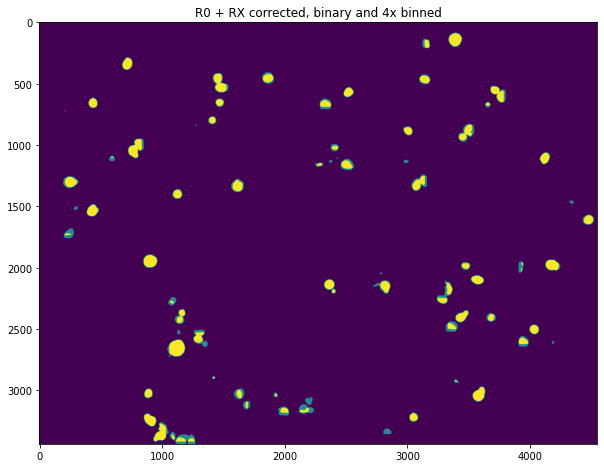

Cannot interpret '<attribute 'dtype' of 'numpy.generic' objects>' as a data type
Cannot interpret '<attribute 'dtype' of 'numpy.generic' objects>' as a data type
day3p5 B03 shifts: [-84.   4.]


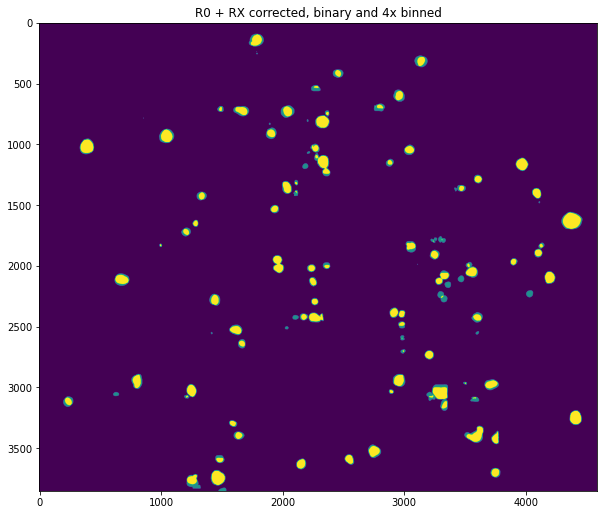

Cannot interpret '<attribute 'dtype' of 'numpy.generic' objects>' as a data type
Cannot interpret '<attribute 'dtype' of 'numpy.generic' objects>' as a data type
day2 B03 shifts: [ 16. -12.]


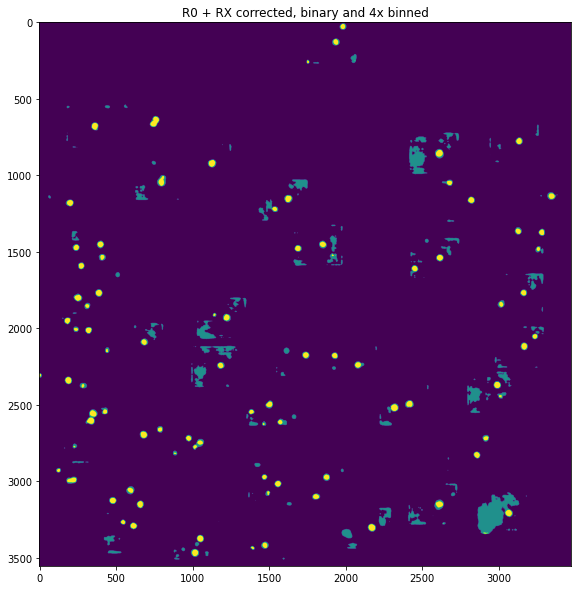

Cannot interpret '<attribute 'dtype' of 'numpy.generic' objects>' as a data type
Cannot interpret '<attribute 'dtype' of 'numpy.generic' objects>' as a data type
day2 B06 shifts: [  8. -12.]


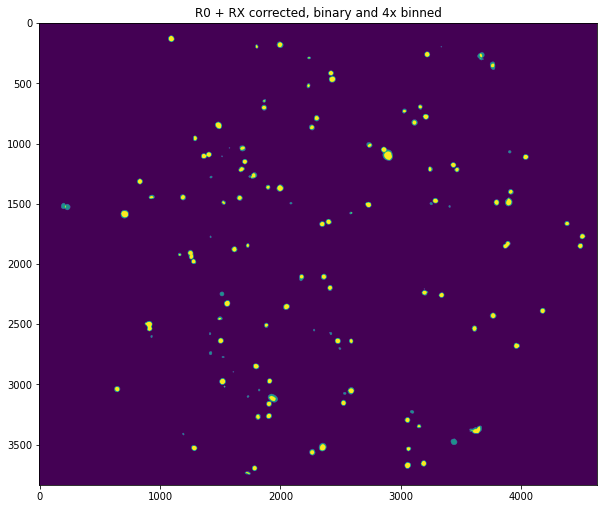

Cannot interpret '<attribute 'dtype' of 'numpy.generic' objects>' as a data type
Cannot interpret '<attribute 'dtype' of 'numpy.generic' objects>' as a data type
day2 B04 shifts: [8. 0.]


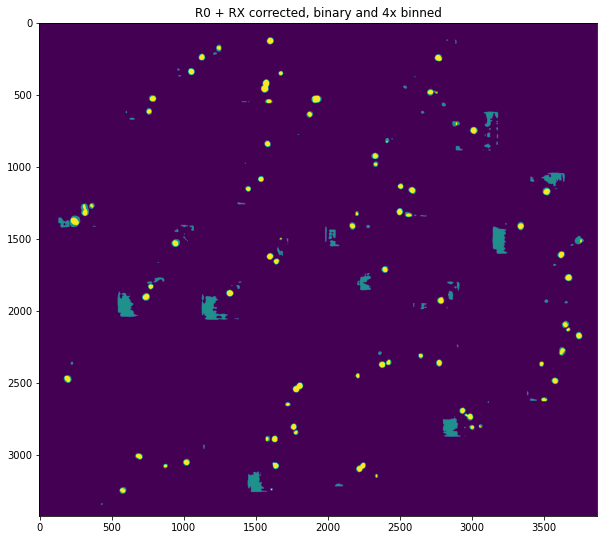

Cannot interpret '<attribute 'dtype' of 'numpy.generic' objects>' as a data type
Cannot interpret '<attribute 'dtype' of 'numpy.generic' objects>' as a data type
day3 B04 shifts: [-44. 112.]


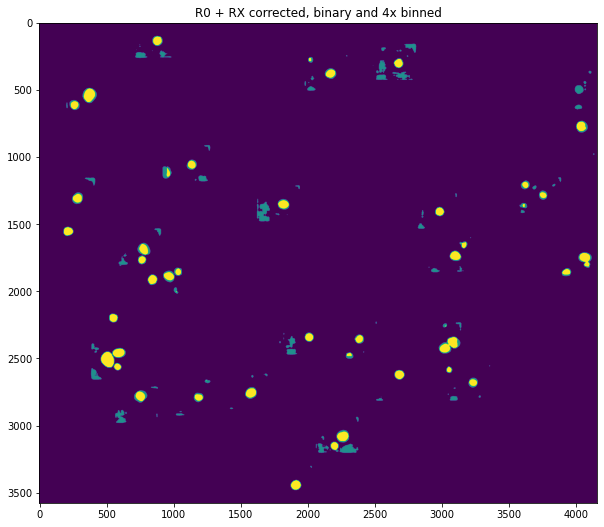

Cannot interpret '<attribute 'dtype' of 'numpy.generic' objects>' as a data type
Cannot interpret '<attribute 'dtype' of 'numpy.generic' objects>' as a data type
day3 B03 shifts: [-20. 148.]


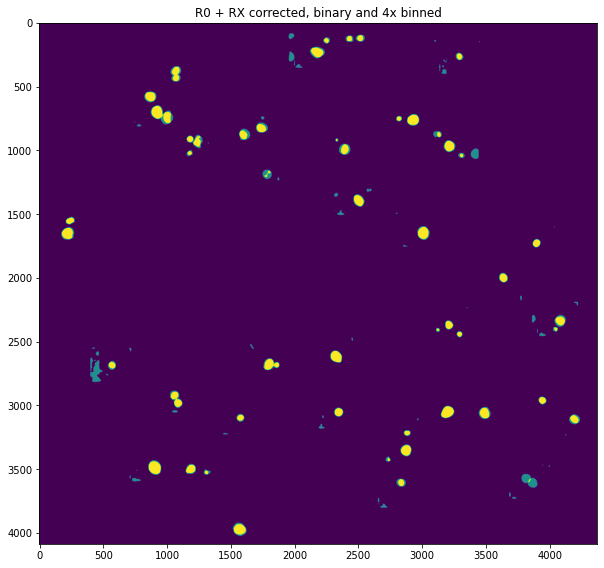

Cannot interpret '<attribute 'dtype' of 'numpy.generic' objects>' as a data type
Cannot interpret '<attribute 'dtype' of 'numpy.generic' objects>' as a data type
day3 B05 shifts: [-40.  96.]


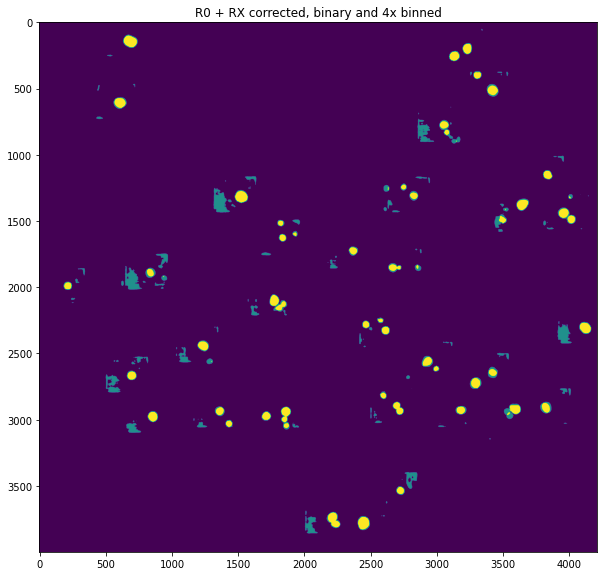

Cannot interpret '<attribute 'dtype' of 'numpy.generic' objects>' as a data type
Cannot interpret '<attribute 'dtype' of 'numpy.generic' objects>' as a data type
day3 B06 shifts: [-40.  88.]


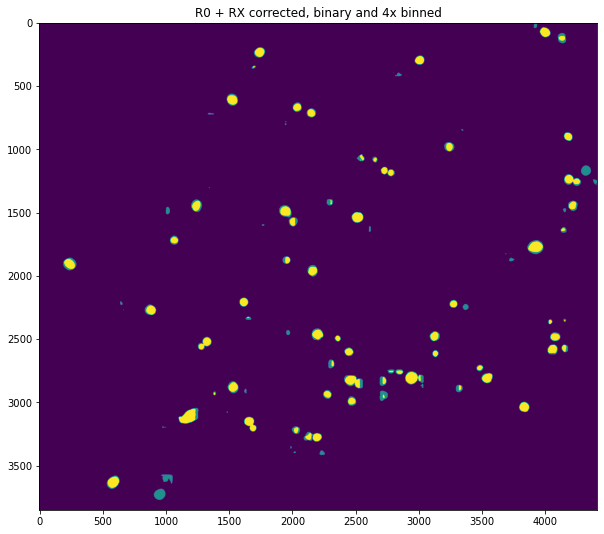

Cannot interpret '<attribute 'dtype' of 'numpy.generic' objects>' as a data type
Cannot interpret '<attribute 'dtype' of 'numpy.generic' objects>' as a data type
day4 B04 shifts: [-96.   0.]


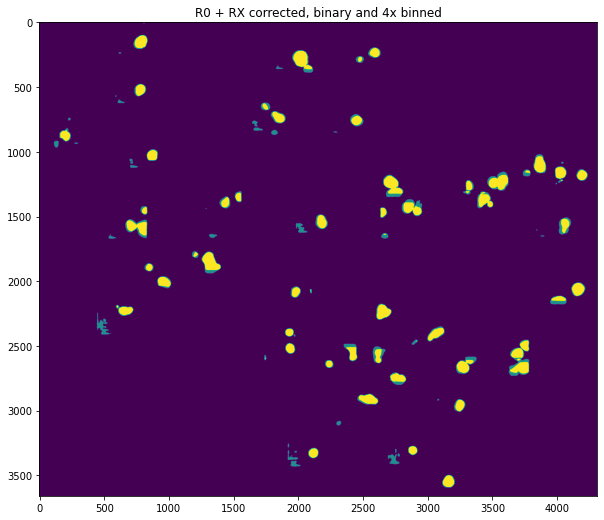

Cannot interpret '<attribute 'dtype' of 'numpy.generic' objects>' as a data type
Cannot interpret '<attribute 'dtype' of 'numpy.generic' objects>' as a data type
day4 B06 shifts: [-92. -48.]


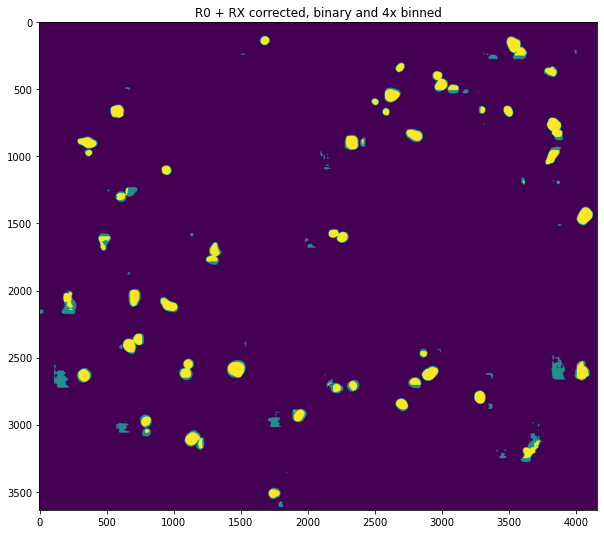

Cannot interpret '<attribute 'dtype' of 'numpy.generic' objects>' as a data type
Cannot interpret '<attribute 'dtype' of 'numpy.generic' objects>' as a data type
day4 B05 shifts: [-92. -24.]


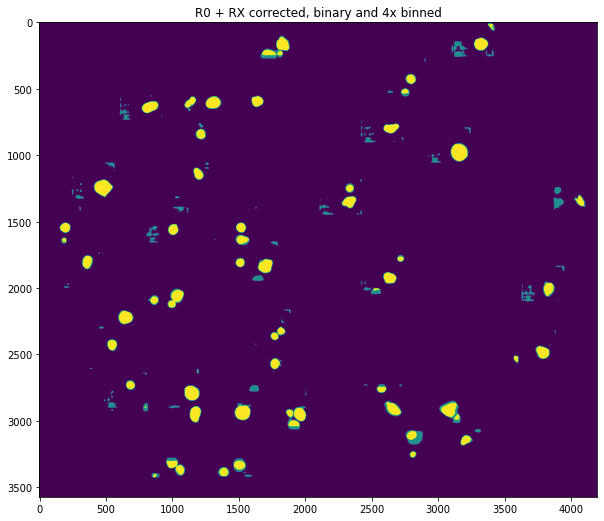

Cannot interpret '<attribute 'dtype' of 'numpy.generic' objects>' as a data type
Cannot interpret '<attribute 'dtype' of 'numpy.generic' objects>' as a data type
day4 B03 shifts: [-96. -12.]


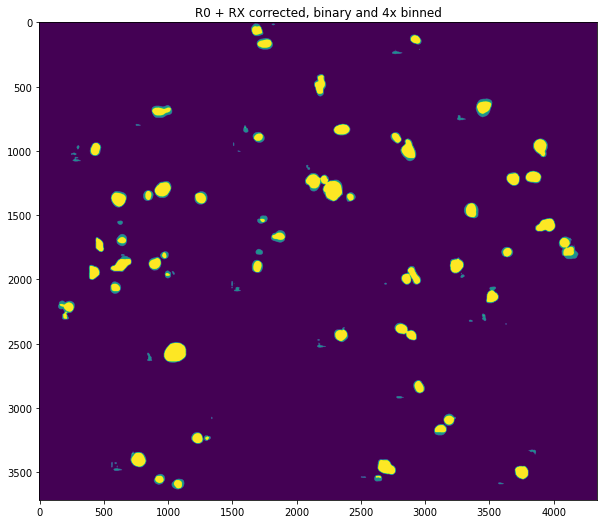

Cannot interpret '<attribute 'dtype' of 'numpy.generic' objects>' as a data type
Cannot interpret '<attribute 'dtype' of 'numpy.generic' objects>' as a data type


In [4]:
R0.only_iterate_over_wells(True)
R0.reset_iterator()

for well in R0:
    well_id = well.well_id
    plate_id = well.plate.plate_id
    
#     if well.plate.plate_id not in ["day2"]: 
#         continue #skip these timepoints
    
    R0_fname = basename(well.segmentations[ovr_channel])
    R0_savedir = os.path.join(well.plate.experiment.root_dir, well.plate.plate_id, "TIF_OVR_MIP_SEG", folder_name)
    
    RX_fname = basename(RX.plates[plate_id].wells[well_id].segmentations[ovr_channel])
    RX_savedir = os.path.join(RX.root_dir, well.plate.plate_id, "TIF_OVR_MIP_SEG", folder_name)
    
#     print(R0_fname, RX_fname)
#     print(R0_savedir,RX_savedir)
    
    #load overviews
    R0_ovr = well.get_segmentation(ovr_channel)[0,:,:]
    RX_ovr = RX.plates[plate_id].wells[well_id].get_segmentation(ovr_channel)[0,:,:]
    
    #pad to make same shape
    R0_pad= np.pad(R0_ovr, [(0, max(0, RX_ovr.shape[0]-R0_ovr.shape[0])), (0, max(0, RX_ovr.shape[1]-R0_ovr.shape[1]))], mode='constant', constant_values=0)
    RX_pad= np.pad(RX_ovr, [(0, max(0, R0_ovr.shape[0]-RX_ovr.shape[0])), (0, max(0, R0_ovr.shape[1]-RX_ovr.shape[1]))], mode='constant', constant_values=0)
    
    if (R0_pad.shape[0] != RX_pad.shape[0]) | (R0_pad.shape[1] != RX_pad.shape[1]):
        print("error! check zero-padding")
    
    #binarize padded overviews
    R0_pad_binary = copy.deepcopy(R0_pad)
    R0_pad_binary[R0_pad_binary>0] = 1 #binarize image

    RX_pad_binary = copy.deepcopy(RX_pad)
    RX_pad_binary[RX_pad_binary>0] = 1 #binarize image
    
    #bin so that registration runs faster
    R0_pad_binary_bin = R0_pad_binary[::4,::4]
    RX_pad_binary_bin = RX_pad_binary[::4,::4]
    
    #calculate shifts
    #returns shift vector (in pixels) required to register moving_image (RX) with reference_image (R0)
    shifts = phase_cross_correlation(R0_pad_binary_bin, RX_pad_binary_bin) #(y,x)
    
    #apply correction to RX overview
    RX_pad_binary_bin_shifted = shift(RX_pad_binary_bin, shifts[0], mode='constant', cval=0)
    RX_pad_shifted = shift(RX_pad, 4*shifts[0], mode='constant', cval=0) #use only for visualization to check alignment

    #plot
    print(plate_id, well_id, "shifts:", 4*shifts[0])
    plt.figure(figsize= (10,10))
    plt.imshow(R0_pad_binary_bin + RX_pad_binary_bin_shifted)
    plt.title('R0 + RX corrected, binary and 4x binned')
    plt.show()
    
    #save
    if not os.path.exists(R0_savedir):
        os.makedirs(R0_savedir)
    if not os.path.exists(RX_savedir):
        os.makedirs(RX_savedir)
        
    imsave(os.path.join(R0_savedir, R0_fname), R0_pad.astype(np.int16), check_contrast=False)
    imsave(os.path.join(RX_savedir, RX_fname), RX_pad_shifted.astype(np.int16), check_contrast=False)

    #add to hcs experiments (R0 and RX)
    R0_seg_file = os.path.join(well.plate.plate_id, "TIF_OVR_MIP_SEG", folder_name, R0_fname)
    RX_seg_file = os.path.join(well.plate.plate_id, "TIF_OVR_MIP_SEG", folder_name, RX_fname)
    
#     well.add_segmentation(seg_name, R0_seg_file) #add to R0
#     RX.plates[plate_id].wells[well_id].add_segmentation(seg_name, RX_seg_file) #add to RX
    
    try:
        # Add the measurement to the faim-hcs datastructure
        well.add_segmentation(seg_name, R0_seg_file) #add to R0
        well.save() #updates json file

    except Exception as e:
        print(e)
        
    try:
        # Add the measurement to the faim-hcs datastructure
        RX.plates[plate_id].wells[well_id].add_segmentation(seg_name, RX_seg_file) #add to RX
        RX.plates[plate_id].wells[well_id].save() #updates json file

    except Exception as e:
        print(e)

    
    


## Load images and initialize spatial index

In [5]:
use_in_memory_db = True  # increases performance by storing all data in-memory

db_path = "sqlite://"

spatial_index = SpatialIndex(
    file_path=db_path,
    properties=[
        {'name': 'well_id', 'type': 'TEXT'},
        {'name': 'plate_id', 'type': 'TEXT'},
        {'name': 'round_id', 'type': 'INTEGER'},
        {'name': 'channel_id', 'type': 'INTEGER'},
        {'name': 'label', 'type': 'INTEGER'},
        {'name': 'geometry', 'type': 'BLOB', 'default': None},
        {'name': 'object_id', 'type': 'INTEGER', 'default': None}
    ]
)


In [6]:
R0.only_iterate_over_wells(True)
R0.reset_iterator()
RX.only_iterate_over_wells(True)
RX.reset_iterator()

with spatial_index:
    for rnd in rounds: #for R0 and RX...
        for well in rounds[rnd]: #for each well that is in R0 and RX
            print(rnd, well.plate.plate_id, well.well_id)
            #ovr_seg = well.get_segmentation(ovr_channel)[0,:,:] #uncomment this is running withour registration
            ovr_seg = well.get_segmentation(seg_name) #load the seg image
            #image_path = os.path.join(row["segmentation_dir"], image_name)
            #image = imread(image_path)[0,:,:]

            for property in regionprops(ovr_seg):
                ul_y, ul_x, lr_y, lr_x = property.bbox
                label = property.label
                roi = property.image.astype(int)
                
                # edges of objects laying on an image border are not
                # correctly detected by find_contours().
                # hence, we pad the roi by 1 pixel.
                padding = (1, 1)
                roi = np.pad(roi, padding, 'constant', constant_values=0)
                
                contour = find_contours(roi, 0)[0]
                
                # find_contours returns an array of (y, x) coordinates
                # while Shapely's Polygon expect (x, y) coordinates.
                # hence, we have to swap the coordinates
                contour = contour[:, [1, 0]]
                
                # finally, we have to correct the contour coordinates which
                # are shifted by the previous padding.
                contour = contour - padding[0]
                
                # convert the contour to a simplified polygon
                # trade-off: precision / storage
                geometry = Polygon(contour)
                geometry = geometry.simplify(0.2, preserve_topology=True)
                
                #WAS: [ul_x, lr_x, ul_y, lr_y, int(z_index), int(z_index)]
                spatial_index.insert(
                    [ul_x, lr_x, ul_y, lr_y],
                    properties={
                        'well_id': well.well_id,
                        'plate_id': well.plate.plate_id,
                        'round_id': int(re.search(r'\d+', rnd).group()), #extract integer from round name
                        'channel_id': int(re.search(r'\d+', ovr_channel).group()), #extract integer from channel name
                        'label': property.label,
                        'geometry': dumps(geometry),
                    }
                )

R0 day2p5 B04
R0 day2p5 B06
R0 day2p5 B05
R0 day2p5 B03
R0 day1p5 B03
R0 day1p5 B05
R0 day1p5 B06
R0 day1p5 B04
R0 day4p5 B06
R0 day4p5 B03
R0 day4p5 B04
R0 day4p5 B05
R0 day3p5 B05
R0 day3p5 B04
R0 day3p5 B06
R0 day3p5 B03
R0 day2 B03
R0 day2 B06
R0 day2 B05
R0 day2 B04
R0 day3 B04
R0 day3 B03
R0 day3 B05
R0 day3 B06
R0 day4 B04
R0 day4 B06
R0 day4 B05
R0 day4 B03
R3 day2p5 B03
R3 day2p5 B05
R3 day2p5 B04
R3 day2p5 B06
R3 day1p5 B03
R3 day1p5 B05
R3 day1p5 B04
R3 day1p5 B06
R3 day4p5 B03
R3 day4p5 B05
R3 day4p5 B04
R3 day4p5 B06
R3 day3p5 B03
R3 day3p5 B05
R3 day3p5 B04
R3 day3p5 B06
R3 day2 B03
R3 day2 B05
R3 day2 B04
R3 day2 B06
R3 day3 B03
R3 day3 B05
R3 day3 B04
R3 day3 B06
R3 day4 B03
R3 day4 B05
R3 day4 B04
R3 day4 B06


## Run matching

In [7]:
# 1. find overlapping regions
with spatial_index:
    R0r = aliased(Region, name='R0')
    RXr = aliased(Region, name='RX')
    R0_desc = aliased(spatial_index.Descriptor, name='R0_desc')
    RX_desc = aliased(spatial_index.Descriptor, name='RX_desc')

    R0_x_centroid = (R0r.x_min + (R0r.x_max - R0r.x_min) / 2.0)
    R0_y_centroid = (R0r.y_min + (R0r.y_max - R0r.y_min) / 2.0)
    RX_x_centroid = (RXr.x_min + (RXr.x_max - RXr.x_min) / 2.0)
    RX_y_centroid = (RXr.y_min + (RXr.y_max - RXr.y_min) / 2.0)
    manhattan_dist = (
        func.abs(R0_x_centroid - RX_x_centroid) +
        func.abs(R0_y_centroid - RX_y_centroid)
    )

    matching_df = pd.DataFrame(
        spatial_index.session.query(
            R0_desc.id.label("R0_desc_id"),
            R0_desc.well_id.label("well_id"),
            R0_desc.plate_id.label("plate_id"),
            R0_desc.channel_id.label("channel_id"),
            R0_desc.round_id.label("R0_round_id"),
            R0_desc.label.label("R0_label"),
            R0_desc.geometry.label("R0_geom"),
            R0_desc.object_id.label("R0_obj_id"),
            R0_x_centroid.label("R0_x_centroid"),
            R0_y_centroid.label("R0_y_centroid"),
            RX_desc.id.label("RX_desc_id"),
            RX_desc.round_id.label("RX_round_id"),
            RX_desc.label.label("RX_label"),
            RX_desc.geometry.label("RX_geom"),
            RX_desc.object_id.label("RX_obj_id"),
            RX_x_centroid.label("RX_x_centroid"),
            RX_y_centroid.label("RX_y_centroid"),
            manhattan_dist.label("manhattan_dist")
        ).filter(
            (R0r.descriptor_id == R0_desc.id) &
            (RXr.descriptor_id == RX_desc.id) &

            (R0_desc.well_id == RX_desc.well_id) &
            (R0_desc.plate_id == RX_desc.plate_id) &
            (R0_desc.channel_id == RX_desc.channel_id) &
            
            (R0_desc.round_id < RX_desc.round_id) &  # prevents as R0 == RX

            (manhattan_dist < min_region_dist)
        ).all()
    )

matching_df["similarity_score"] = 0.0
for rid, row in matching_df.iterrows():
    # NOTE: all geometries' coordinates are relative
    R0_geom = loads(row["R0_geom"])
    RX_geom = loads(row["RX_geom"])

    # plot geometries
    # plt.plot(*R0_geom.exterior.xy)
    # plt.plot(*RX_geom.exterior.xy)
    # plt.show()

    matching_df.loc[rid, "similarity_score"] = (
        R0_geom.buffer(0.0).intersection(RX_geom.buffer(0.0)).area /
        R0_geom.buffer(0.0).union(RX_geom.buffer(0.0)).area *
        np.exp(-0.001 * row["manhattan_dist"])
    )

In [8]:
# 2. find best overlapping regions
matching_df["round_delta"] = matching_df.apply(
    lambda row: row['RX_round_id'] - row['R0_round_id'],
    axis=1
)

R0_groups = matching_df.groupby(["well_id", "channel_id", "plate_id", "R0_round_id", "R0_label"])
for _, RX_group in R0_groups:
    RX_group = RX_group.sort_values(
        ['round_delta', 'similarity_score'], ascending=[True, False]
    )
    # remove all but the closest target (in respect to the similarity score)
    matching_df.drop(RX_group.index[1:], inplace=True)

RX_groups = matching_df.groupby(["well_id", "channel_id", "plate_id", "RX_round_id", "RX_label"])
for _, R0_group in RX_groups:
    R0_group = R0_group.sort_values(
        ['round_delta', 'similarity_score'], ascending=[True, False]
    )
    # remove all but the closest source (in respect to the similarity score)
    matching_df.drop(R0_group.index[1:], inplace=True)

In [9]:
# 3. link overlapping regions
matching_df = matching_df.sort_values(["R0_round_id"])
for rid in matching_df.index:
    row = matching_df.loc[rid]
    R0_obj_id = row["R0_obj_id"]
    RX_obj_id = row["RX_obj_id"]

    if R0_obj_id != None and RX_obj_id is not None:
        if R0_obj_id == RX_obj_id:
            pass
        else:
            print(
                "WARNING: Multiple links found for region "
                "%s! Skip additional assignments." % (
                    {
                        "well_id": row["well_id"],
                        "plate_id": row["plate_id"],
                        "channel_id": row["channel_id"],
                        "round_id": row["R0_round_id"],
                        "label": row["R0_label"]
                    },
                )
            )
        continue

    if row["similarity_score"] < min_similariry_score:
        print(
            (
                "WARNING: Region '%s' and '%s' has a"
                "similarity score (%s) that is lower than the threshold (%s)."
            ) % (
                {
                    "well_id": row["well_id"],
                    "plate_id": row["plate_id"],
                    "channel_id": row["channel_id"],
                    "round_id": row["R0_round_id"],
                    "label": row["R0_label"]
                },
                {
                    "well_id": row["well_id"],
                    "plate_id": row["plate_id"],
                    "channel_id": row["channel_id"],
                    "round_id": row["RX_round_id"],
                    "label": row["RX_label"]
                },
                row["similarity_score"],
                min_similariry_score
            )
        )

    if R0_obj_id is None:
        with spatial_index:
            next_obj_id = spatial_index.session.query(
                func.ifnull(
                    func.max(spatial_index.Descriptor.object_id), 0
                ) + 1
            ).subquery().as_scalar()

            # NOTE: atomic operation
            # required if algorithm is run in parallel
            spatial_index.session.query(
                spatial_index.Descriptor
            ).filter(
                spatial_index.Descriptor.id == int(row["R0_desc_id"])
            ).update(
                {
                    "object_id": next_obj_id
                }, synchronize_session='fetch'
            )
            spatial_index.session.commit()

            R0_obj_id = spatial_index.session.query(
                spatial_index.Descriptor.object_id
            ).filter(
                spatial_index.Descriptor.id == int(row["R0_desc_id"])
            ).one()[0]
        matching_df.loc[rid, "R0_obj_id"] = R0_obj_id

    if RX_obj_id is None:
        with spatial_index:
            spatial_index.session.query(
                spatial_index.Descriptor
            ).filter(
                spatial_index.Descriptor.id == int(row["RX_desc_id"])
            ).update(
                {
                    "object_id": R0_obj_id
                }
            )
        matching_df.loc[rid, "RX_obj_id"] = R0_obj_id
        matching_df.loc[
            (matching_df["well_id"] == row["well_id"]) &
            (matching_df["plate_id"] == row["plate_id"]) &
            (matching_df["channel_id"] == row["channel_id"]) &
            (matching_df["R0_round_id"] == row["RX_round_id"]) &
            (matching_df["R0_label"] == row["RX_label"]),
            "R0_obj_id"
        ] = R0_obj_id

In [10]:
matching_df_filt = matching_df.loc[matching_df['similarity_score'] > min_similariry_score].copy(deep=True)
matching_df_filt

,R0_desc_id,well_id,plate_id,channel_id,R0_round_id,R0_label,R0_geom,R0_obj_id,R0_x_centroid,R0_y_centroid,RX_desc_id,RX_round_id,RX_label,RX_geom,RX_obj_id,RX_x_centroid,RX_y_centroid,manhattan_dist,similarity_score,round_delta
0,1778,B04,day2,1,0,67,b'\x01\x03\x00\x00\x00\x01\x00\x00\x00\x0b\x01...,1,782.0,9905.0,4046,3,68,b'\x01\x03\x00\x00\x00\x01\x00\x00\x00\xff\x00...,1,801.0,9894.0,30.0,0.853111,3
1416,1668,B05,day2,1,0,41,b'\x01\x03\x00\x00\x00\x01\x00\x00\x00\xe5\x00...,2,2980.5,7815.5,3938,3,39,b'\x01\x03\x00\x00\x00\x01\x00\x00\x00\xc9\x00...,2,3031.5,8013.0,248.5,0.673327,3
1415,1667,B05,day2,1,0,40,b'\x01\x03\x00\x00\x00\x01\x00\x00\x00\xeb\x00...,3,3073.0,7642.5,3937,3,38,b'\x01\x03\x00\x00\x00\x01\x00\x00\x00\xdb\x00...,3,3055.5,7680.0,55.0,0.665672,3
1413,1563,B06,day2,1,0,56,b'\x01\x03\x00\x00\x00\x01\x00\x00\x00k\x01\x0...,5,2851.0,6332.0,4115,3,50,b'\x01\x03\x00\x00\x00\x01\x00\x00\x00U\x01\x0...,5,2837.5,6355.0,36.5,0.914862,3
1412,1559,B06,day2,1,0,52,b'\x01\x03\x00\x00\x00\x01\x00\x00\x00\xf1\x00...,6,814.0,6068.5,4110,3,45,b'\x01\x03\x00\x00\x00\x01\x00\x00\x00\xed\x00...,6,946.5,6106.5,170.5,0.688944,3
1411,1546,B06,day2,1,0,39,b'\x01\x03\x00\x00\x00\x01\x00\x00\x00\xf3\x00...,7,3342.5,5254.0,4100,3,35,b'\x01\x03\x00\x00\x00\x01\x00\x00\x00\xed\x00...,7,3357.5,5259.0,20.0,0.894773,3
1408,1729,B04,day2,1,0,18,b'\x01\x03\x00\x00\x00\x01\x00\x00\x00\xc9\x00...,10,11551.5,2819.0,4000,3,21,b'\x01\x03\x00\x00\x00\x01\x00\x00\x00\xbf\x00...,10,11629.0,2808.0,88.5,0.580652,3
1407,1728,B04,day2,1,0,17,b'\x01\x03\x00\x00\x00\x01\x00\x00\x00\xc3\x00...,11,7507.0,2569.5,3999,3,20,b'\x01\x03\x00\x00\x00\x01\x00\x00\x00\xe9\x00...,11,7531.0,2552.5,41.0,0.896131,3
1406,1727,B04,day2,1,0,16,b'\x01\x03\x00\x00\x00\x01\x00\x00\x00\xc1\x00...,12,3061.5,2491.5,3998,3,19,b'\x01\x03\x00\x00\x00\x01\x00\x00\x00\xfd\x00...,12,3051.0,2464.0,38.0,0.868694,3
1418,1670,B05,day2,1,0,43,b'\x01\x03\x00\x00\x00\x01\x00\x00\x00a\x01\x0...,13,2959.5,8128.0,3941,3,42,b'\x01\x03\x00\x00\x00\x01\x00\x00\x00\x19\x01...,13,2864.0,8105.5,118.0,0.496086,3


## Save matching results in hcs experiment directory 

In [11]:
R0.only_iterate_over_wells(True)
R0.reset_iterator()

df = matching_df_filt[["plate_id", "well_id", "R0_label", "R0_x_centroid", "R0_y_centroid", "RX_label", "RX_x_centroid", "RX_y_centroid", "manhattan_dist", "similarity_score"]]

for well in R0: #for each well that is in R0...
    p = well.plate.plate_id
    w = well.well_id
    df_save = df.loc[(df["plate_id"] == p) & (df["well_id"] == w)]
    
    df_save = df_save.sort_values(by=["R0_label"])
    df_save.drop(['plate_id', 'well_id'], inplace=True, axis=1)
    
    df_save['hcs_experiment_'+names[0]] = well.plate.experiment.name
    df_save['root_dir_'+names[0]] = well.plate.experiment.root_dir
    df_save['segmentation_ovr_'+names[0]] = well.segmentations[ovr_channel]
    df_save['well_id'] = w
    df_save['plate_id'] = p
    df_save['channel_id'] = ovr_channel
    
    df_save['hcs_experiment_'+names[1]] = RX.name
    df_save['root_dir_'+names[1]] = RX.root_dir
    df_save['segmentation_ovr_'+names[1]] = RX.plates[p].wells[w].segmentations[ovr_channel]

#     df_save['hcs_experiment_'+names[0]] = well.plate.experiment.name
#     df_save['root_dir_'+names[0]] = well.plate.experiment.root_dir
#     df_save['segmentation_ovr_'+names[0]] = well.segmentations[ovr_channel]
#     df_save['well_id_'+names[0]] = w
#     df_save['plate_id_'+names[0]] = p
#     df_save['channel_id_'+names[0]] = ovr_channel
    
#     df_save['hcs_experiment_'+names[1]] = RX.name
#     df_save['root_dir_'+names[1]] = RX.root_dir
#     df_save['segmentation_ovr_'+names[1]] = RX.plates[p].wells[w].segmentations[ovr_channel]
#     df_save['well_id_'+names[1]] = w
#     df_save['plate_id_'+names[1]] = p
#     df_save['channel_id_'+names[1]] = ovr_channel
        
    # df_save measurement into the well directory.
    name = "linking_ovr_" + str(ovr_channel) + "_" + names[1] + "to" + names[0]
    path = join(well.well_dir, name + ".csv")
    df_save.to_csv(path, index=False) #df_saves csv

    try:
        # Add the measurement to the faim-hcs datastructure
        well.add_measurement(name, path)
        well.save() #updates json file

    except Exception as e:
        print(e)
    
    
print('Saved!') 

    

Cannot interpret '<attribute 'dtype' of 'numpy.generic' objects>' as a data type
Cannot interpret '<attribute 'dtype' of 'numpy.generic' objects>' as a data type
Cannot interpret '<attribute 'dtype' of 'numpy.generic' objects>' as a data type
Cannot interpret '<attribute 'dtype' of 'numpy.generic' objects>' as a data type
Cannot interpret '<attribute 'dtype' of 'numpy.generic' objects>' as a data type
Cannot interpret '<attribute 'dtype' of 'numpy.generic' objects>' as a data type
Cannot interpret '<attribute 'dtype' of 'numpy.generic' objects>' as a data type
Cannot interpret '<attribute 'dtype' of 'numpy.generic' objects>' as a data type
Cannot interpret '<attribute 'dtype' of 'numpy.generic' objects>' as a data type
Cannot interpret '<attribute 'dtype' of 'numpy.generic' objects>' as a data type
Cannot interpret '<attribute 'dtype' of 'numpy.generic' objects>' as a data type
Cannot interpret '<attribute 'dtype' of 'numpy.generic' objects>' as a data type
Cannot interpret '<attribute